In [48]:
import os
os.getcwd()


'C:\\Users\\Nishil Gangrade\\Desktop\\IPO_Analysis'

In [49]:
import pandas as pd

df = pd.read_excel("ipo_data.xlsx")
df.head()


,COMPANY NAME,Category,LTP (Rs),Market Cap (Cr),Listing date,Issue Size,Issue Price,QIB Subscription,HNI Subscription,retail subscription,total Subscription,Listing Open (Rs),Listing Close (Rs),Listing Gain %,Current Gain %
0,Sameera Agro,Agriculture,16,95.3,01 Jan `24,62.6 Cr,₹ 180,-,1.7x,3.9x,2.8x,180,171,0.0%,-55.6%
1,AIK Pipes,Manufacturing,62,39.4,02 Jan `24,15.0 Cr,₹ 89,-,53.5x,29.4x,41.4x,100,105,12.4%,-30.4%
2,Manoj Ceramic,Manufacturing,119.6,178.3,03 Jan `24,14.5 Cr,₹ 62,-,7.0x,10.2x,8.6x,82,77.9,32.3%,92.9%
3,Shri Balaji Valve,Manufacturing,134.9,110.1,03 Jan `24,21.6 Cr,₹ 100,70.0x,800.1x,169.9x,276.5x,190,199.5,90.0%,34.9%
4,HRH Next Services,Misc,30.3,39.9,03 Jan `24,9.6 Cr,₹ 36,-,63.7x,60.3x,62.0x,41,43,13.9%,-16.0%


In [50]:
COMP_COL = "COMPANY NAME"  

df["company_clean"] = df[COMP_COL].astype(str).str.strip().str.replace(r"\s+", " ", regex=True).str.title()
df["company_clean_upper"] = df["company_clean"].str.replace(r"[^A-Z0-9 ]", "", regex=True).str.upper()

df[["company_clean", "company_clean_upper"]].head()

,company_clean,company_clean_upper
0,Sameera Agro,S A
1,Aik Pipes,A P
2,Manoj Ceramic,M C
3,Shri Balaji Valve,S B V
4,Hrh Next Services,H N S


In [51]:

import pandas as pd
import numpy as np

df = pd.read_excel("ipo_data.xlsx")

rs_cols = ['LTP (Rs)', 'Issue Price', 'Listing Open (Rs)', 'Listing Close (Rs)']
for col in rs_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('Rs', '', regex=False)
        .str.replace('₹', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

pct_cols = ['Listing Gain %', 'Current Gain %']
for col in pct_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('%', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

subs_cols = ['QIB Subscription', 'HNI Subscription', 'retail subscription', 'total Subscription']
for col in subs_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('x', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

size_cols = ['Issue Size', 'Market Cap (Cr)']
for col in size_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('Cr', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

df['Listing date'] = pd.to_datetime(df['Listing date'], errors='coerce', dayfirst=True)

print(df.dtypes)
print(df.head())


COMPANY NAME                   object
Category                       object
LTP (Rs)                      float64
Market Cap (Cr)               float64
Listing date           datetime64[ns]
Issue Size                    float64
Issue Price                   float64
QIB Subscription              float64
HNI Subscription              float64
retail subscription           float64
total Subscription            float64
Listing Open (Rs)             float64
Listing Close (Rs)            float64
Listing Gain %                float64
Current Gain %                float64
dtype: object
        COMPANY NAME       Category  LTP (Rs)  Market Cap (Cr) Listing date  \
0       Sameera Agro    Agriculture      16.0             95.3          NaT   
1          AIK Pipes  Manufacturing      62.0             39.4          NaT   
2      Manoj Ceramic  Manufacturing     119.6            178.3          NaT   
3  Shri Balaji Valve  Manufacturing     134.9            110.1          NaT   
4  HRH Next Services 

C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\366003454.py:49: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [52]:

df['Listing date'] = df['Listing date'].astype(str).str.replace("`", "", regex=False).str.strip()

df['Listing date'] = pd.to_datetime(df['Listing date'], format='%d %b %y', errors='coerce')


In [53]:
print(df['Listing date'].head(10))


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: Listing date, dtype: datetime64[ns]


In [54]:
import pandas as pd
import numpy as np

df = pd.read_excel("ipo_data.xlsx")

rs_cols = ['LTP (Rs)', 'Issue Price', 'Listing Open (Rs)', 'Listing Close (Rs)']
for col in rs_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('Rs', '', regex=False)
        .str.replace('₹', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

pct_cols = ['Listing Gain %', 'Current Gain %']
for col in pct_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('%', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

subs_cols = ['QIB Subscription', 'HNI Subscription', 'retail subscription', 'total Subscription']
for col in subs_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('x', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

size_cols = ['Issue Size', 'Market Cap (Cr)']
for col in size_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('Cr', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('-', '0')
        .astype(float)
    )

df['Listing date'] = df['Listing date'].astype(str).str.replace("`", "", regex=False).str.strip()

df['Listing date'] = pd.to_datetime(df['Listing date'], format='%d %b %y', errors='coerce')


print(df.dtypes)
print(df.head())


COMPANY NAME                   object
Category                       object
LTP (Rs)                      float64
Market Cap (Cr)               float64
Listing date           datetime64[ns]
Issue Size                    float64
Issue Price                   float64
QIB Subscription              float64
HNI Subscription              float64
retail subscription           float64
total Subscription            float64
Listing Open (Rs)             float64
Listing Close (Rs)            float64
Listing Gain %                float64
Current Gain %                float64
dtype: object
        COMPANY NAME       Category  LTP (Rs)  Market Cap (Cr) Listing date  \
0       Sameera Agro    Agriculture      16.0             95.3   2024-01-01   
1          AIK Pipes  Manufacturing      62.0             39.4   2024-01-02   
2      Manoj Ceramic  Manufacturing     119.6            178.3   2024-01-03   
3  Shri Balaji Valve  Manufacturing     134.9            110.1   2024-01-03   
4  HRH Next Services 

In [55]:
print(df['Listing date'].head(10))


0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-03
4   2024-01-03
5   2024-01-03
6   2024-01-05
7   2024-01-08
8   2024-01-16
9   2024-01-16
Name: Listing date, dtype: datetime64[ns]


In [56]:
import pandas as pd
import numpy as np

df = pd.read_excel("ipo_data.xlsx")

df.columns = [c.strip() for c in df.columns]

df = df.replace({'-': np.nan, '': np.nan})

def clean_money_col(s):
    return (
        s.astype(str)
         .str.replace('Rs', '', regex=False)
         .str.replace('₹', '', regex=False)
         .str.replace(',', '', regex=False)
         .str.strip()
         .replace('nan', np.nan)
    )

def clean_pct_col(s):
    return (
        s.astype(str)
         .str.replace('%', '', regex=False)
         .str.replace(',', '', regex=False)
         .str.strip()
         .replace('nan', np.nan)
    )

rs_cols = ['LTP (Rs)', 'Issue Price', 'Listing Open (Rs)', 'Listing Close (Rs)']
for col in rs_cols:
    if col in df.columns:
        df[col] = clean_money_col(df[col]).replace('', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

pct_cols = ['Listing Gain %', 'Current Gain %']
for col in pct_cols:
    if col in df.columns:
        df[col] = clean_pct_col(df[col]).replace('', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

subs_cols = ['QIB Subscription', 'HNI Subscription', 'retail subscription', 'total Subscription']
for col in subs_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('x', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df[col] = df[col].replace('nan', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

size_cols = ['Issue Size', 'Market Cap (Cr)']
for col in size_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('Cr', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df[col] = df[col].replace('nan', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)

if 'Listing date' in df.columns:
    df['Listing date'] = df['Listing date'].astype(str).str.replace("`", "", regex=False).str.strip()
    df['Listing date'] = pd.to_datetime(df['Listing date'], format='%d %b %y', errors='coerce')

print("Column types after cleaning:")
print(df.dtypes)
print("\nFirst 5 rows (cleaned):")
display(df.head())

df.to_excel("ipo_clean.xlsx", index=False)
print("\nSaved cleaned data to ipo_clean.xlsx")


Column types after cleaning:
COMPANY NAME                   object
Category                       object
LTP (Rs)                      float64
Market Cap (Cr)               float64
Listing date           datetime64[ns]
Issue Size                    float64
Issue Price                     int64
QIB Subscription              float64
HNI Subscription              float64
retail subscription           float64
total Subscription            float64
Listing Open (Rs)             float64
Listing Close (Rs)            float64
Listing Gain %                float64
Current Gain %                float64
dtype: object

First 5 rows (cleaned):


,COMPANY NAME,Category,LTP (Rs),Market Cap (Cr),Listing date,Issue Size,Issue Price,QIB Subscription,HNI Subscription,retail subscription,total Subscription,Listing Open (Rs),Listing Close (Rs),Listing Gain %,Current Gain %
0,Sameera Agro,Agriculture,16.0,95.3,2024-01-01,62.6,180,0.0,1.7,3.9,2.8,180.0,171.0,0.0,-55.6
1,AIK Pipes,Manufacturing,62.0,39.4,2024-01-02,15.0,89,0.0,53.5,29.4,41.4,100.0,105.0,12.4,-30.4
2,Manoj Ceramic,Manufacturing,119.6,178.3,2024-01-03,14.5,62,0.0,7.0,10.2,8.6,82.0,77.9,32.3,92.9
3,Shri Balaji Valve,Manufacturing,134.9,110.1,2024-01-03,21.6,100,70.0,800.1,169.9,276.5,190.0,199.5,90.0,34.9
4,HRH Next Services,Misc,30.3,39.9,2024-01-03,9.6,36,0.0,63.7,60.3,62.0,41.0,43.0,13.9,-16.0



Saved cleaned data to ipo_clean.xlsx


In [57]:
if 'Category' in df.columns:
    df['Category'] = df['Category'].astype(str).str.strip()
    df.loc[df['Category'].isin(['nan','None','NoneType', '']), 'Category'] = 'Misc'
    
    categories = sorted(df['Category'].unique())

    cat_to_code = {cat: i+1 for i, cat in enumerate(categories)}

    df['Category_code'] = df['Category'].map(cat_to_code).fillna(0).astype(int)

    mapping_df = pd.DataFrame(list(cat_to_code.items()), columns=['Category', 'Category_code']).sort_values('Category_code')
    mapping_df.to_csv('category_mapping.csv', index=False)
    print("Saved category mapping to category_mapping.csv")
    display(mapping_df)

    df.to_excel("ipo_clean_with_catcodes.xlsx", index=False)
    print("Saved cleaned file with category codes to ipo_clean_with_catcodes.xlsx")
else:
    print("No 'Category' column found. Please check column names.")


Saved category mapping to category_mapping.csv


,Category,Category_code
0,Agriculture,1
1,Chemicals,2
2,Energy,3
3,FMCG,4
4,Finance,5
5,Healthcare,6
6,Hospitality,7
7,IT & Telecom,8
8,Infrastructure,9
9,Logistics,10


Saved cleaned file with category codes to ipo_clean_with_catcodes.xlsx


In [58]:
print("Sample rows with Category and Category_code:")
display(df[['COMPANY NAME','Category','Category_code','Listing date','Listing Gain %','total Subscription']].head(10))

print("\nCounts per category (top 20):")
display(df['Category'].value_counts().head(20))

print("\nAny missing Listing dates? (True means missing)")
print(df['Listing date'].isna().any())

print("\nSummary of Listing Gain % (min, median, mean, max):")
print(df['Listing Gain %'].describe())


Sample rows with Category and Category_code:


,COMPANY NAME,Category,Category_code,Listing date,Listing Gain %,total Subscription
0,Sameera Agro,Agriculture,1,2024-01-01,0.0,2.8
1,AIK Pipes,Manufacturing,11,2024-01-02,12.4,41.4
2,Manoj Ceramic,Manufacturing,11,2024-01-03,32.3,8.6
3,Shri Balaji Valve,Manufacturing,11,2024-01-03,90.0,276.5
4,HRH Next Services,Misc,12,2024-01-03,13.9,62.0
5,Akanksha Power,Energy,3,2024-01-03,12.7,108.9
6,Kay Cee Energy,Energy,3,2024-01-05,366.7,959.5
7,Kaushalya Logistics,Logistics,10,2024-01-08,33.3,364.2
8,IBL Finance,Finance,5,2024-01-16,9.8,16.2
9,Jyoti CNC Automation,Manufacturing,11,2024-01-16,11.8,38.5



Counts per category (top 20):


Category
Manufacturing     157
Misc               69
IT & Telecom       67
FMCG               62
Energy             44
Infrastructure     42
Healthcare         41
Logistics          29
Finance            25
Chemicals          20
Agriculture        17
Hospitality         5
Name: count, dtype: int64


Any missing Listing dates? (True means missing)
False

Summary of Listing Gain % (min, median, mean, max):
count    578.000000
mean      33.762111
std       54.195766
min      -48.100000
25%        0.725000
50%       14.700000
75%       50.000000
max      386.700000
Name: Listing Gain %, dtype: float64


Sector-wise summary (sorted by mean gain):


,Category,count,mean_gain,median_gain,std_gain
2,Energy,44,70.754545,54.40,89.487056
7,IT & Telecom,67,42.032836,28.00,51.496488
11,Misc,69,35.310145,18.90,53.206322
5,Healthcare,41,35.085366,19.80,56.948861
10,Manufacturing,157,32.510191,14.30,54.892565
0,Agriculture,17,29.405882,30.80,42.653993
1,Chemicals,20,27.865000,8.10,52.183686
8,Infrastructure,42,25.476190,8.70,35.546842
9,Logistics,29,22.251724,7.10,35.804605
3,FMCG,62,21.743548,9.95,38.509878


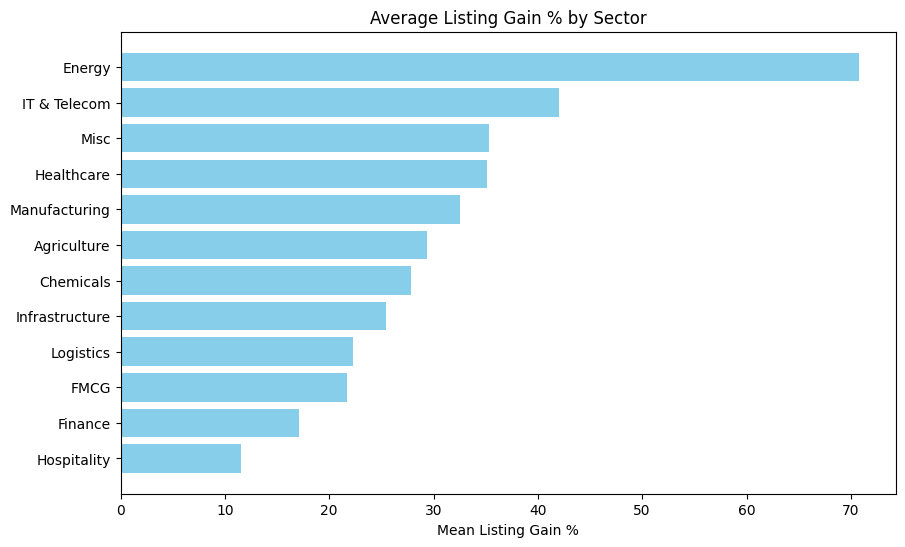

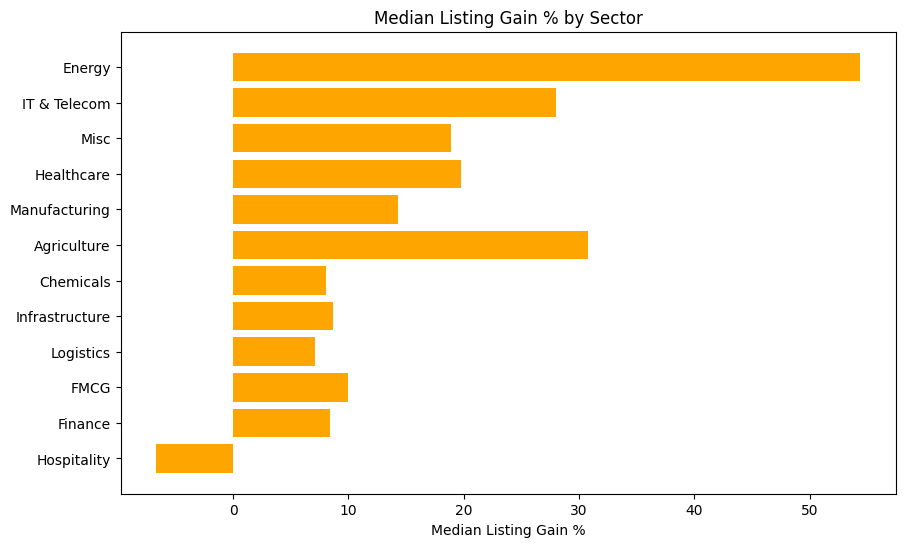

In [59]:
import matplotlib.pyplot as plt

sector_summary = df.groupby("Category").agg(
    count=("COMPANY NAME", "count"),
    mean_gain=("Listing Gain %", "mean"),
    median_gain=("Listing Gain %", "median"),
    std_gain=("Listing Gain %", "std")
).reset_index().sort_values("mean_gain", ascending=False)

print("Sector-wise summary (sorted by mean gain):")
display(sector_summary)

plt.figure(figsize=(10,6))
plt.barh(sector_summary["Category"], sector_summary["mean_gain"], color="skyblue")
plt.xlabel("Mean Listing Gain %")
plt.title("Average Listing Gain % by Sector")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(sector_summary["Category"], sector_summary["median_gain"], color="orange")
plt.xlabel("Median Listing Gain %")
plt.title("Median Listing Gain % by Sector")
plt.gca().invert_yaxis()
plt.show()


Saved sector summary to sector_summary.xlsx
Saved sector_mean_gain.png
Saved sector_median_gain.png


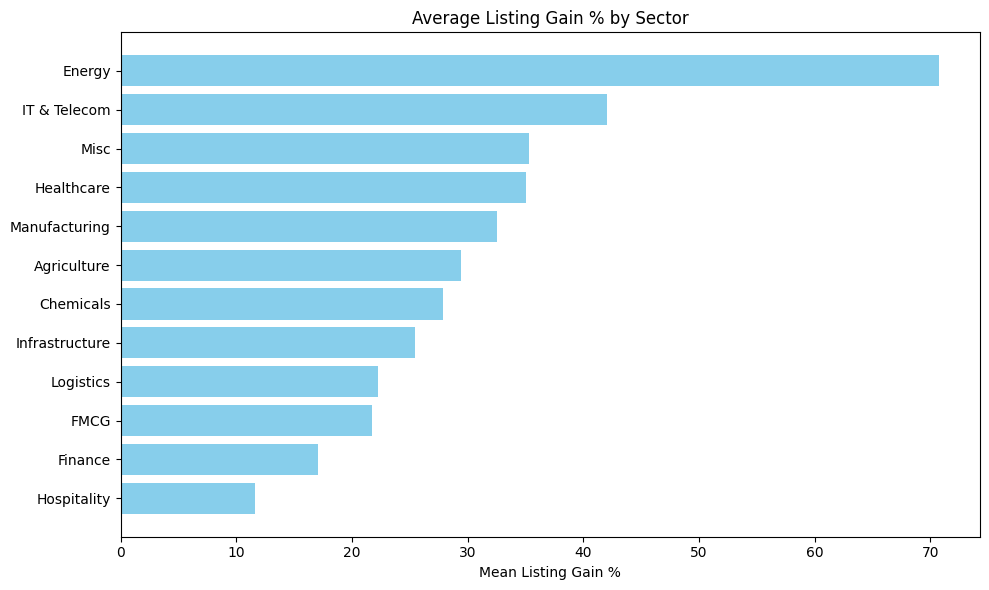

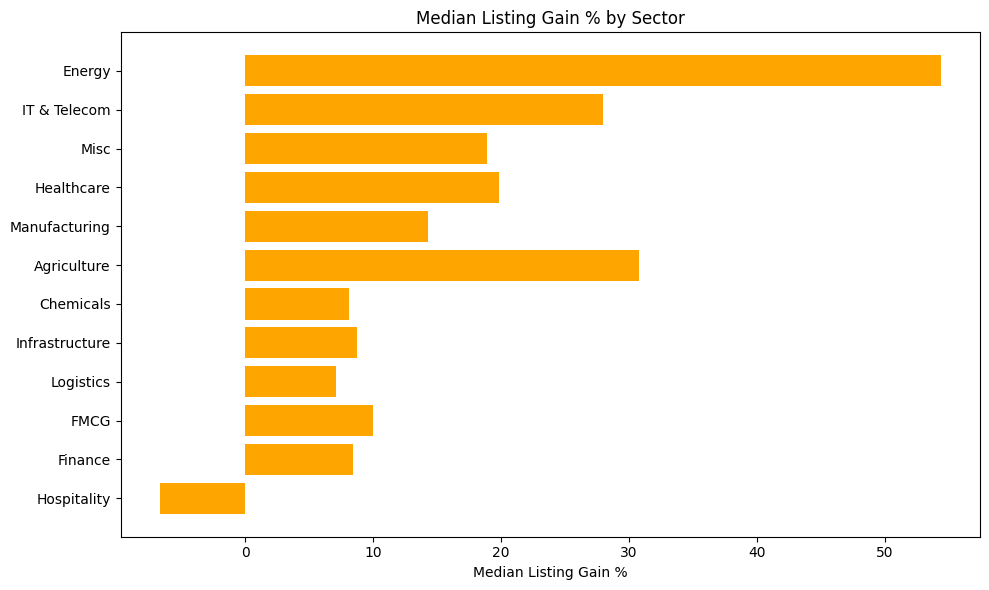

In [60]:
sector_summary.to_excel("sector_summary.xlsx", index=False)
print("Saved sector summary to sector_summary.xlsx")

plt.figure(figsize=(10,6))
plt.barh(sector_summary["Category"], sector_summary["mean_gain"], color="skyblue")
plt.xlabel("Mean Listing Gain %")
plt.title("Average Listing Gain % by Sector")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("sector_mean_gain.png")
print("Saved sector_mean_gain.png")

plt.figure(figsize=(10,6))
plt.barh(sector_summary["Category"], sector_summary["median_gain"], color="orange")
plt.xlabel("Median Listing Gain %")
plt.title("Median Listing Gain % by Sector")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("sector_median_gain.png")
print("Saved sector_median_gain.png")


Correlation between QIB Subscription and Listing Gain %: 0.386
Correlation between HNI Subscription and Listing Gain %: 0.574
Correlation between retail subscription and Listing Gain %: 0.624
Correlation between total Subscription and Listing Gain %: 0.623


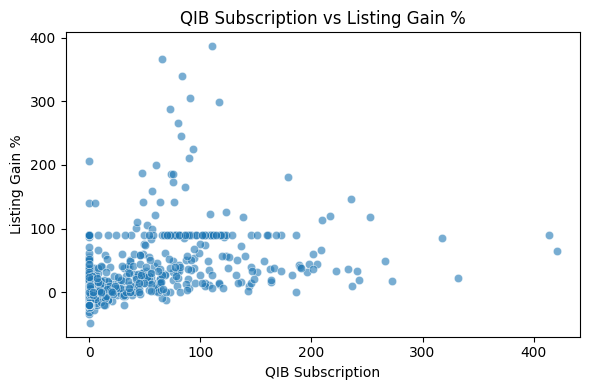

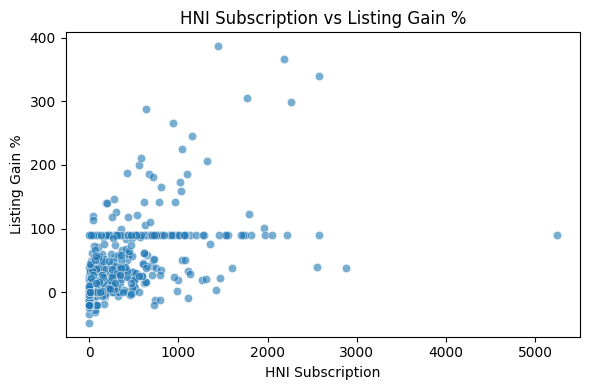

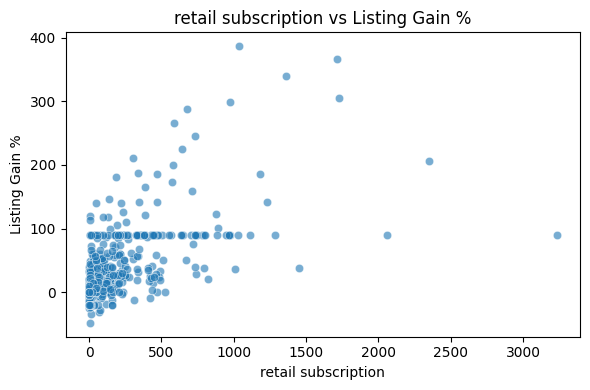

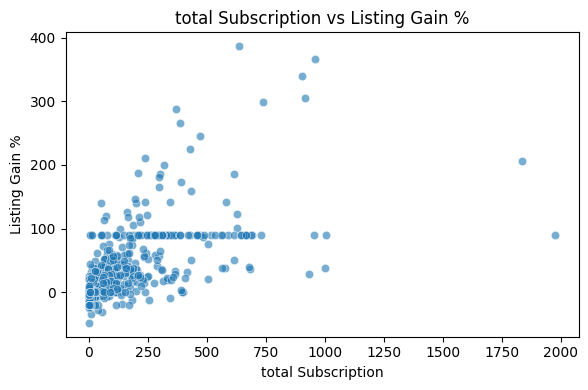


QIB Subscription bins vs Listing Gain %:


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\2757210386.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,QIB Subscription_bin,count,mean,median
0,Low,147,13.895918,3.70
1,Mid-Low,142,6.371831,2.50
2,Mid-High,144,42.454861,24.55
3,High,145,72.093103,57.70



HNI Subscription bins vs Listing Gain %:


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\2757210386.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,HNI Subscription_bin,count,mean,median
0,Low,145,-0.817241,0.0
1,Mid-Low,144,15.223611,9.2
2,Mid-High,144,36.075694,28.2
3,High,145,84.454483,90.0



retail subscription bins vs Listing Gain %:


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\2757210386.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,retail subscription_bin,count,mean,median
0,Low,145,1.461379,0.00
1,Mid-Low,144,15.218750,7.90
2,Mid-High,144,30.247222,21.95
3,High,145,87.968966,90.00



total Subscription bins vs Listing Gain %:


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\2757210386.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,total Subscription_bin,count,mean,median
0,Low,145,-0.590345,0.00
1,Mid-Low,144,12.938889,6.85
2,Mid-High,144,33.343056,28.85
3,High,145,89.210345,90.00


In [61]:
import seaborn as sns

subs_cols = ['QIB Subscription', 'HNI Subscription', 'retail subscription', 'total Subscription']

for col in subs_cols:
    corr = df[col].corr(df['Listing Gain %'])
    print(f"Correlation between {col} and Listing Gain %: {corr:.3f}")

for col in subs_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Listing Gain %'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Listing Gain %")
    plt.title(f"{col} vs Listing Gain %")
    plt.tight_layout()
    plt.savefig(f"{col.replace(' ','_')}_vs_gain.png")
    plt.show()

for col in subs_cols:
    df[f"{col}_bin"] = pd.qcut(df[col], 4, labels=["Low","Mid-Low","Mid-High","High"])
    grouped = df.groupby(f"{col}_bin")['Listing Gain %'].agg(['count','mean','median']).reset_index()
    print(f"\n{col} bins vs Listing Gain %:")
    display(grouped)
    grouped.to_excel(f"{col.replace(' ','_')}_bins_vs_gain.xlsx", index=False)


Correlation between Total Subscription and Listing Gain %: 0.623


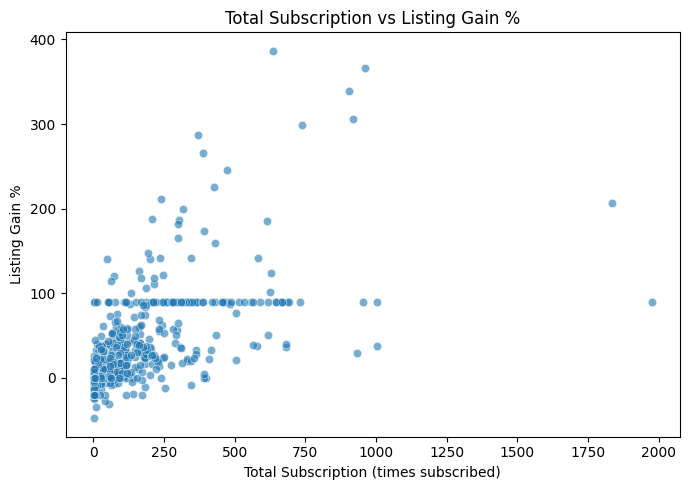


Quartile analysis: Total Subscription vs Listing Gain %


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\4066583885.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,TotalSub_bin,count,mean,median
0,Low,145,-0.590345,0.00
1,Mid-Low,144,12.938889,6.85
2,Mid-High,144,33.343056,28.85
3,High,145,89.210345,90.00


Saved quartile table: total_sub_bins_vs_gain.xlsx


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_total = df['total Subscription'].corr(df['Listing Gain %'])
print(f"Correlation between Total Subscription and Listing Gain %: {corr_total:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['total Subscription'], y=df['Listing Gain %'], alpha=0.6)
plt.xlabel("Total Subscription (times subscribed)")
plt.ylabel("Listing Gain %")
plt.title("Total Subscription vs Listing Gain %")
plt.tight_layout()
plt.savefig("total_sub_vs_gain.png")
plt.show()

df['TotalSub_bin'] = pd.qcut(df['total Subscription'], 4, labels=["Low","Mid-Low","Mid-High","High"])
quartile_summary = df.groupby('TotalSub_bin')['Listing Gain %'].agg(['count','mean','median']).reset_index()

print("\nQuartile analysis: Total Subscription vs Listing Gain %")
display(quartile_summary)

quartile_summary.to_excel("total_sub_bins_vs_gain.xlsx", index=False)
print("Saved quartile table: total_sub_bins_vs_gain.xlsx")


Analyzing: QIB Subscription
Correlation between QIB Subscription and Listing Gain %: 0.386


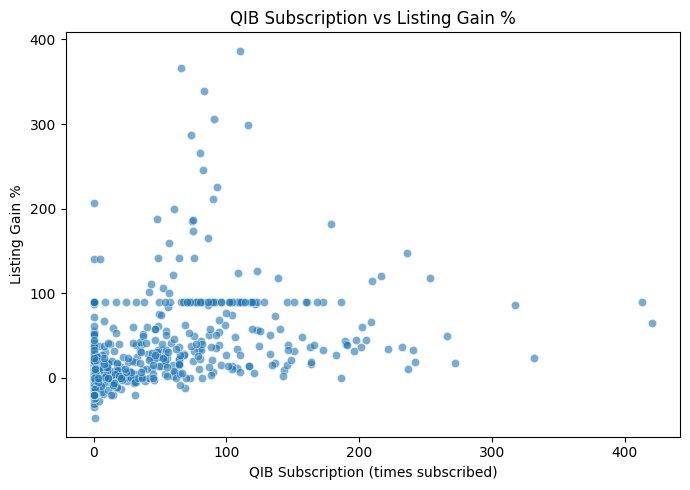


Quartile analysis: QIB Subscription vs Listing Gain %


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1815733155.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,QIB Subscription_bin,count,mean,median
0,Low,147,13.895918,3.70
1,Mid-Low,142,6.371831,2.50
2,Mid-High,144,42.454861,24.55
3,High,145,72.093103,57.70


Saved quartile table: QIB_Subscription_bins_vs_gain.xlsx

Analyzing: HNI Subscription
Correlation between HNI Subscription and Listing Gain %: 0.574


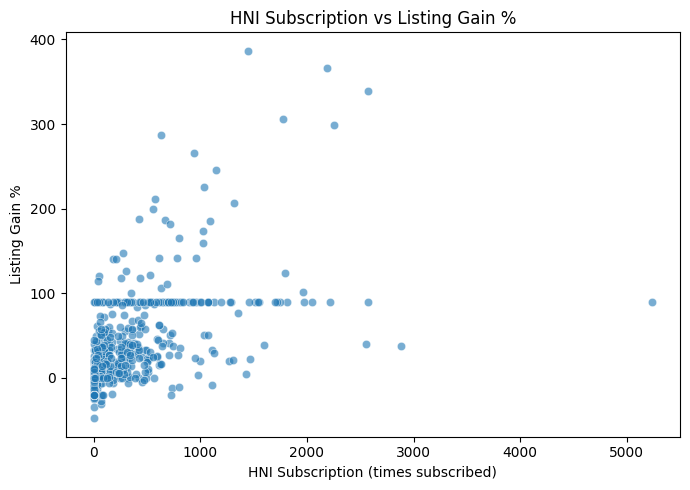


Quartile analysis: HNI Subscription vs Listing Gain %


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1815733155.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,HNI Subscription_bin,count,mean,median
0,Low,145,-0.817241,0.0
1,Mid-Low,144,15.223611,9.2
2,Mid-High,144,36.075694,28.2
3,High,145,84.454483,90.0


Saved quartile table: HNI_Subscription_bins_vs_gain.xlsx

Analyzing: retail subscription
Correlation between retail subscription and Listing Gain %: 0.624


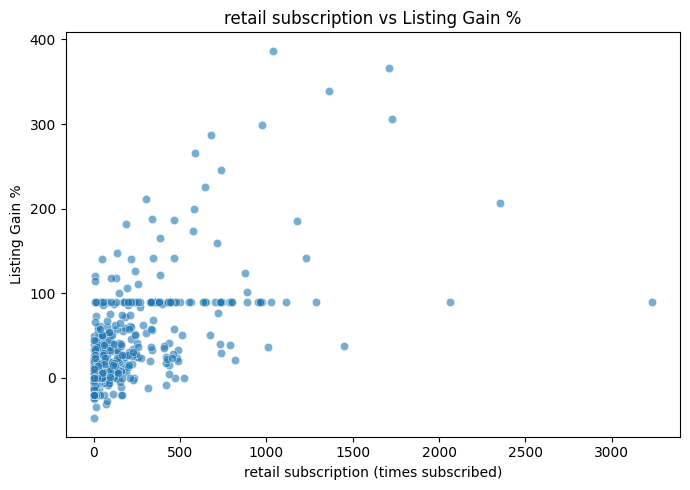


Quartile analysis: retail subscription vs Listing Gain %


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1815733155.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,retail subscription_bin,count,mean,median
0,Low,145,1.461379,0.00
1,Mid-Low,144,15.218750,7.90
2,Mid-High,144,30.247222,21.95
3,High,145,87.968966,90.00


Saved quartile table: retail_subscription_bins_vs_gain.xlsx



In [63]:
subs_cols = ['QIB Subscription', 'HNI Subscription', 'retail subscription']

for col in subs_cols:
    print("="*60)
    print(f"Analyzing: {col}")
    
    corr = df[col].corr(df['Listing Gain %'])
    print(f"Correlation between {col} and Listing Gain %: {corr:.3f}")
    
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[col], y=df['Listing Gain %'], alpha=0.6)
    plt.xlabel(f"{col} (times subscribed)")
    plt.ylabel("Listing Gain %")
    plt.title(f"{col} vs Listing Gain %")
    plt.tight_layout()
    plt.savefig(f"{col.replace(' ','_')}_vs_gain.png")
    plt.show()
    
    # 3. Quartile/bin analysis
    df[f"{col}_bin"] = pd.qcut(df[col], 4, labels=["Low","Mid-Low","Mid-High","High"])
    quartile_summary = df.groupby(f"{col}_bin")['Listing Gain %'].agg(['count','mean','median']).reset_index()
    
    print(f"\nQuartile analysis: {col} vs Listing Gain %")
    display(quartile_summary)
    
    quartile_summary.to_excel(f"{col.replace(' ','_')}_bins_vs_gain.xlsx", index=False)
    print(f"Saved quartile table: {col.replace(' ','_')}_bins_vs_gain.xlsx\n")


Correlation between Market Cap and Listing Gain %: -0.036


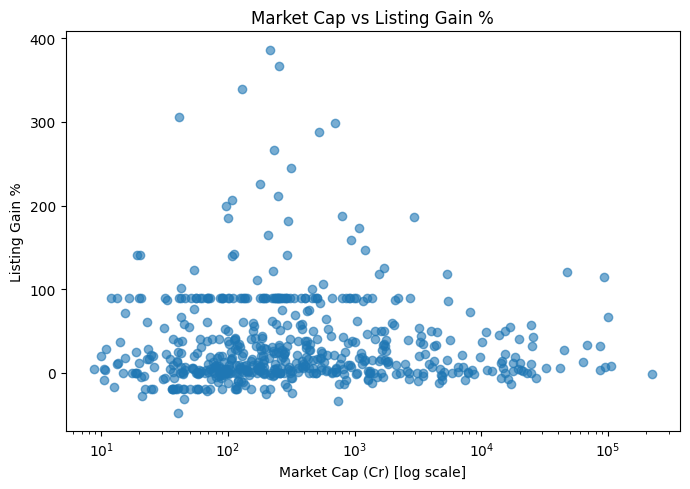


Market Cap Quartile Analysis:


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\3056714987.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,MarketCap_bin,count,mean,median
0,Small,145,23.990345,7.10
1,Mid-Small,144,37.616667,13.30
2,Mid-Large,144,45.712500,24.55
3,Large,145,27.837931,14.30


Saved marketcap_bins_vs_gain.xlsx


In [64]:

corr_mc = df['Market Cap (Cr)'].corr(df['Listing Gain %'])
print(f"Correlation between Market Cap and Listing Gain %: {corr_mc:.3f}")

plt.figure(figsize=(7,5))
plt.scatter(df['Market Cap (Cr)'], df['Listing Gain %'], alpha=0.6)
plt.xscale("log")  
plt.xlabel("Market Cap (Cr) [log scale]")
plt.ylabel("Listing Gain %")
plt.title("Market Cap vs Listing Gain %")
plt.tight_layout()
plt.savefig("marketcap_vs_gain.png")
plt.show()

df['MarketCap_bin'] = pd.qcut(df['Market Cap (Cr)'], 4, labels=["Small","Mid-Small","Mid-Large","Large"])
mc_summary = df.groupby('MarketCap_bin')['Listing Gain %'].agg(['count','mean','median']).reset_index()

print("\nMarket Cap Quartile Analysis:")
display(mc_summary)

mc_summary.to_excel("marketcap_bins_vs_gain.xlsx", index=False)
print("Saved marketcap_bins_vs_gain.xlsx")


In [65]:
import pandas as pd
import numpy as np

sector_medians = df.groupby('Category')['Listing Gain %'].median().sort_values(ascending=False)
top3_sectors = sector_medians.head(3).index.tolist()
print("Top 3 sectors by median Listing Gain % (highest first):")
print(sector_medians.head(3))
print("\nSelected top3_sectors:", top3_sectors)

subs_filter_label = "Mid-High"
mc_filter_label   = "Mid-Large"

if 'TotalSub_bin' not in df.columns:
    df['TotalSub_bin'] = pd.qcut(df['total Subscription'], 4, labels=["Low","Mid-Low","Mid-High","High"])

if 'MarketCap_bin' not in df.columns:
    df['MarketCap_bin'] = pd.qcut(df['Market Cap (Cr)'], 4, labels=["Small","Mid-Small","Mid-Large","Large"])

candidates = df[
    (df['TotalSub_bin'] == subs_filter_label) &
    (df['MarketCap_bin'] == mc_filter_label) &
    (df['Category'].isin(top3_sectors))
].copy()

if 'listing_gain_calc_pct' not in candidates.columns and ('Listing Open (Rs)' in candidates.columns and 'Issue Price' in candidates.columns):
    candidates['listing_gain_calc_pct'] = ((candidates['Listing Open (Rs)'] - candidates['Issue Price']) / candidates['Issue Price']) * 100

cols_for_export = [
    'COMPANY NAME', 'Category', 'Category_code' if 'Category_code' in df.columns else None,
    'Listing date', 'Issue Price', 'Market Cap (Cr)', 'Issue Size', 'total Subscription',
    'QIB Subscription', 'HNI Subscription', 'retail subscription',
    'Listing Open (Rs)', 'Listing Close (Rs)', 'Listing Gain %', 'listing_gain_calc_pct'
]
cols_for_export = [c for c in cols_for_export if c and c in candidates.columns]

candidates_sorted = candidates.sort_values('Listing Gain %', ascending=False)
candidates_export = candidates_sorted[cols_for_export].reset_index(drop=True)

candidates_export.to_excel("ipo_candidates.xlsx", index=False)
candidates_export.head(20).to_csv("ipo_candidates_top20.csv", index=False)
print(f"\nSaved {len(candidates_export)} candidate IPO(s) to ipo_candidates.xlsx (top 20 saved to ipo_candidates_top20.csv)")

print("\n=== Candidates Summary ===")
if len(candidates_export) == 0:
    print("No IPOs match the strict filter (Mid-High total subs, Mid-Large market cap, top3 sectors).")
else:
    print("Counts by sector among candidates:")
    print(candidates_export['Category'].value_counts())
    print("\nTop 10 candidates (by Listing Gain %):")
    display(candidates_export.head(10))
    print("\nBasic stats for candidate Listing Gain %:")
    print(candidates_export['Listing Gain %'].describe())

if len(candidates_export) == 0:
    print("\nNo matches with the strict 3-pillar filter. Trying a relaxed filter:")
    relaxed = df[
        (df['TotalSub_bin'].isin(['Mid-Low','Mid-High'])) &
        (df['MarketCap_bin'].isin(['Mid-Small','Mid-Large'])) &
        (df['Category'].isin(top3_sectors))
    ].copy()
    if len(relaxed) > 0:
        relaxed_export = relaxed.sort_values('Listing Gain %', ascending=False)[cols_for_export].reset_index(drop=True)
        relaxed_export.to_excel("ipo_candidates_relaxed.xlsx", index=False)
        print(f"Saved {len(relaxed_export)} relaxed candidates to ipo_candidates_relaxed.xlsx")
        display(relaxed_export.head(10))
    else:
        print("Still no matches after relaxing filters. Consider modifying top3 sectors or bins.")


Top 3 sectors by median Listing Gain % (highest first):
Category
Energy          54.4
Agriculture     30.8
IT & Telecom    28.0
Name: Listing Gain %, dtype: float64

Selected top3_sectors: ['Energy', 'Agriculture', 'IT & Telecom']

Saved 9 candidate IPO(s) to ipo_candidates.xlsx (top 20 saved to ipo_candidates_top20.csv)

=== Candidates Summary ===
Counts by sector among candidates:
Category
IT & Telecom    4
Agriculture     3
Energy          2
Name: count, dtype: int64

Top 10 candidates (by Listing Gain %):


,COMPANY NAME,Category,Category_code,Listing date,Issue Price,Market Cap (Cr),Issue Size,total Subscription,QIB Subscription,HNI Subscription,retail subscription,Listing Open (Rs),Listing Close (Rs),Listing Gain %,listing_gain_calc_pct
0,Sahasra Electronic Solutions Ltd.,IT & Telecom,8,2024-10-04,283,789.5,186.2,113.6,53.6,346.8,99.5,537.7,564.5,90.0,90.000000
1,Petro Carbon,Energy,3,2024-07-02,171,434.6,113.2,83.8,49.1,169.5,96.7,300.0,315.0,75.4,75.438596
2,Shubhshree Biofuels Energy Ltd.,Energy,3,2024-09-16,119,241.6,16.6,119.4,14.7,327.4,179.8,189.0,198.4,58.8,58.823529
3,Meta Infotech,IT & Telecom,8,2025-07-11,161,308.8,80.2,155.3,77.3,405.2,159.7,225.0,236.3,39.8,39.751553
4,Nova Agritech,Agriculture,1,2024-01-31,41,446.1,143.8,109.4,79.3,224.1,77.1,55.0,57.8,34.1,34.146341
5,Mach Conferences and Events Ltd.,Agriculture,1,2024-09-11,225,254.5,125.3,182.0,146.7,293.0,136.5,300.0,295.6,33.3,33.333333
6,Ramdevbaba Solvent,Agriculture,1,2024-04-23,85,289.8,50.3,116.9,34.9,416.4,105.8,112.0,117.6,31.8,31.764706
7,Unified Data Tech Solutions,IT & Telecom,8,2025-05-29,273,806.5,144.5,84.9,44.5,282.6,57.9,285.0,299.3,4.4,4.395604
8,CapitalNumbers Infotech Ltd.,IT & Telecom,8,2025-01-27,263,296.2,169.4,125.0,64.8,394.9,95.5,274.0,261.4,4.2,4.182510



Basic stats for candidate Listing Gain %:
count     9.000000
mean     41.311111
std      29.127111
min       4.200000
25%      31.800000
50%      34.100000
75%      58.800000
max      90.000000
Name: Listing Gain %, dtype: float64


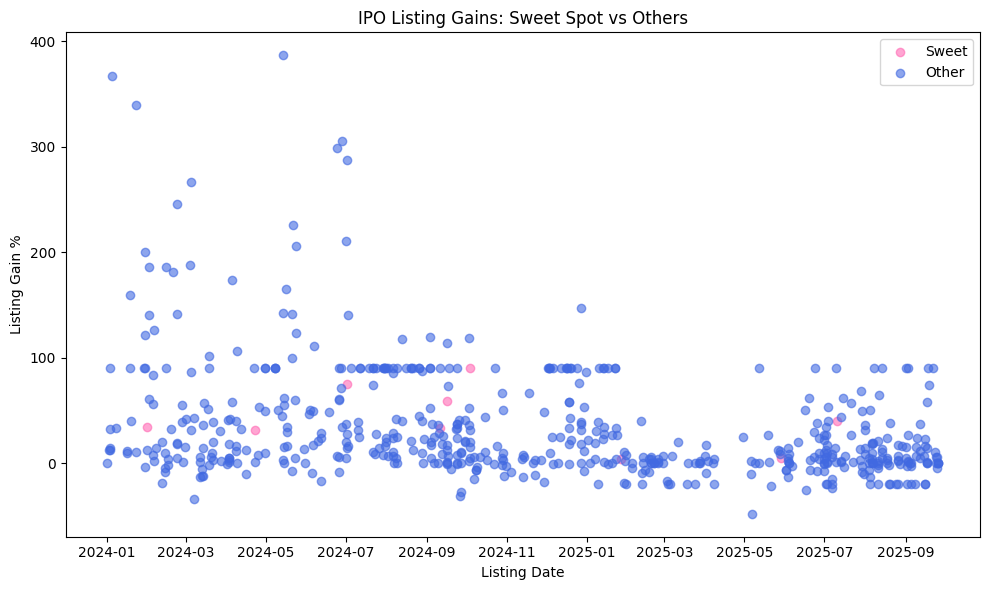

In [66]:
import matplotlib.pyplot as plt

sweet_names = set(candidates_export['COMPANY NAME'])  # list of sweet spot company names

df['SweetSpot'] = df['COMPANY NAME'].apply(lambda x: "Sweet" if x in sweet_names else "Other")

# Scatter plot
plt.figure(figsize=(10,6))
for label, color in [("Sweet", "hotpink"), ("Other", "royalblue")]:
    subset = df[df['SweetSpot'] == label]
    plt.scatter(subset['Listing date'], subset['Listing Gain %'], 
                label=label, alpha=0.6, color=color)

plt.xlabel("Listing Date")
plt.ylabel("Listing Gain %")
plt.title("IPO Listing Gains: Sweet Spot vs Others")
plt.legend()
plt.tight_layout()
plt.savefig("sweet_vs_others_scatter.png")
plt.show()


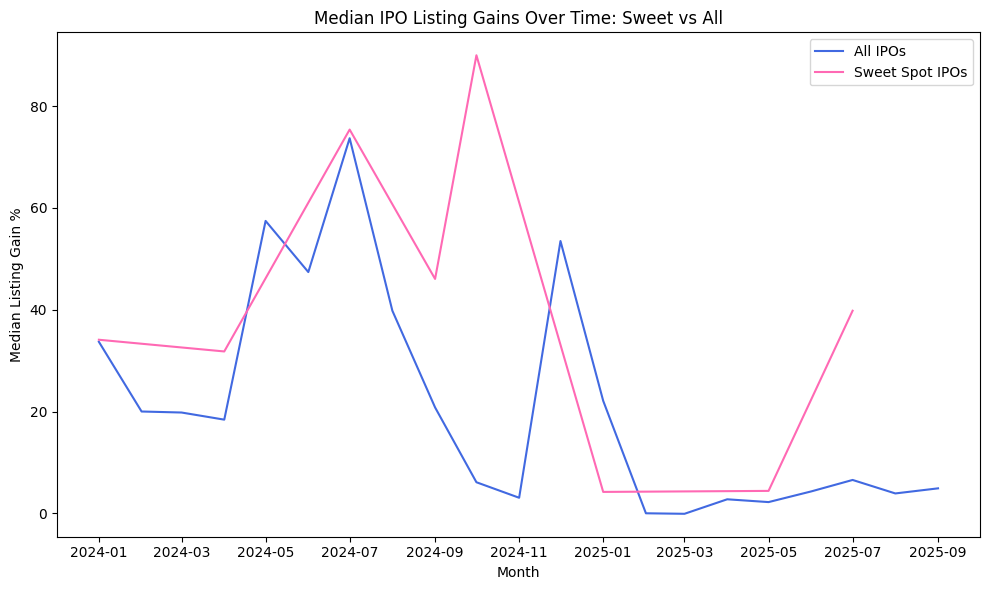

In [67]:
# Resample monthly for trend comparison
df['Month'] = df['Listing date'].dt.to_period("M").dt.to_timestamp()

median_all = df.groupby('Month')['Listing Gain %'].median().reset_index()
median_sweet = df[df['SweetSpot']=="Sweet"].groupby('Month')['Listing Gain %'].median().reset_index()

plt.figure(figsize=(10,6))
plt.plot(median_all['Month'], median_all['Listing Gain %'], label="All IPOs", color="royalblue")
plt.plot(median_sweet['Month'], median_sweet['Listing Gain %'], label="Sweet Spot IPOs", color="hotpink")

plt.xlabel("Month")
plt.ylabel("Median Listing Gain %")
plt.title("Median IPO Listing Gains Over Time: Sweet vs All")
plt.legend()
plt.tight_layout()
plt.savefig("sweet_vs_all_line.png")
plt.show()


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\836431257.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




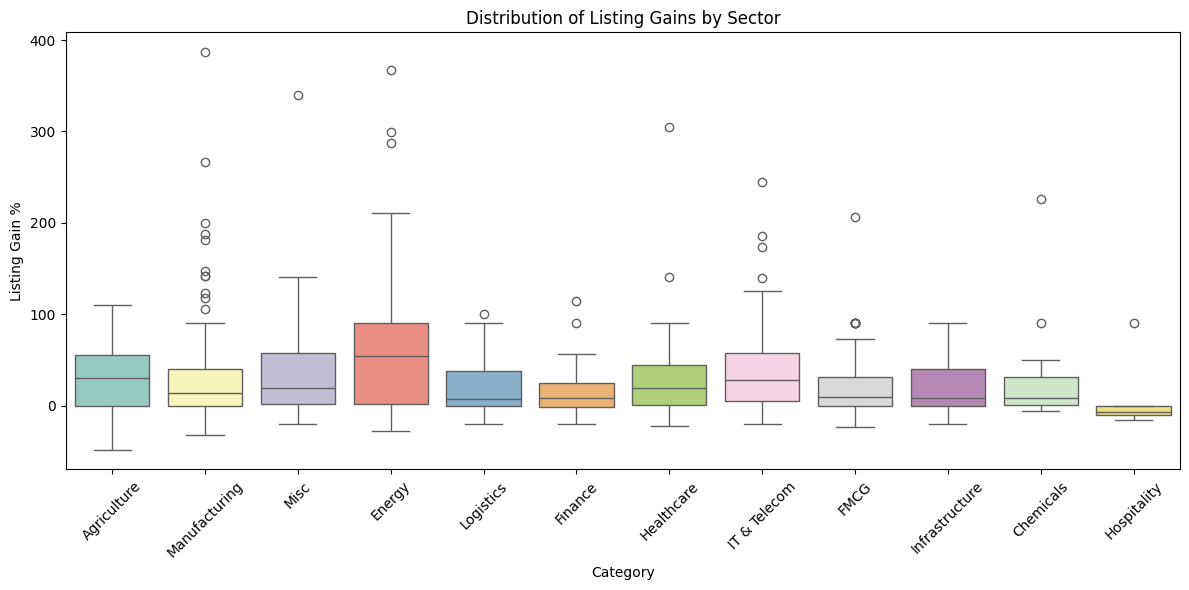

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Listing Gain %", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribution of Listing Gains by Sector")
plt.tight_layout()
plt.savefig("boxplot_sector_gain.png")
plt.show()



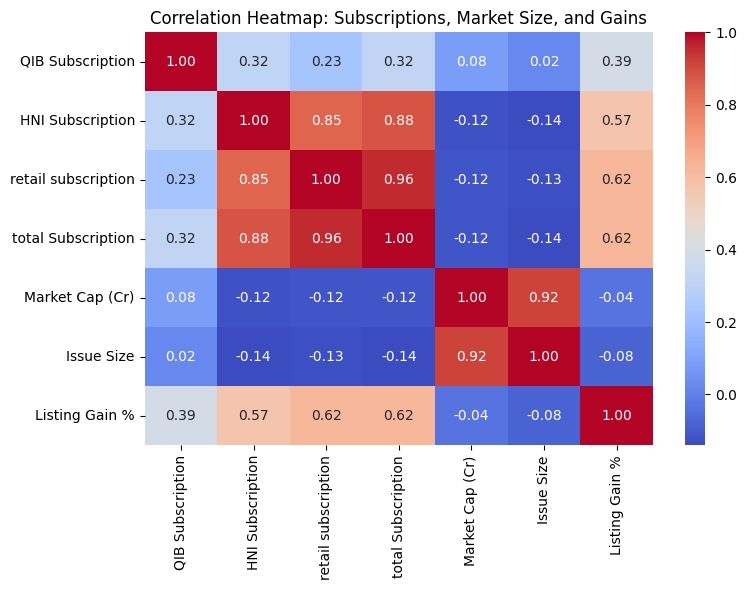

In [69]:
plt.figure(figsize=(8,6))
corr = df[['QIB Subscription','HNI Subscription','retail subscription','total Subscription',
           'Market Cap (Cr)','Issue Size','Listing Gain %']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Subscriptions, Market Size, and Gains")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()



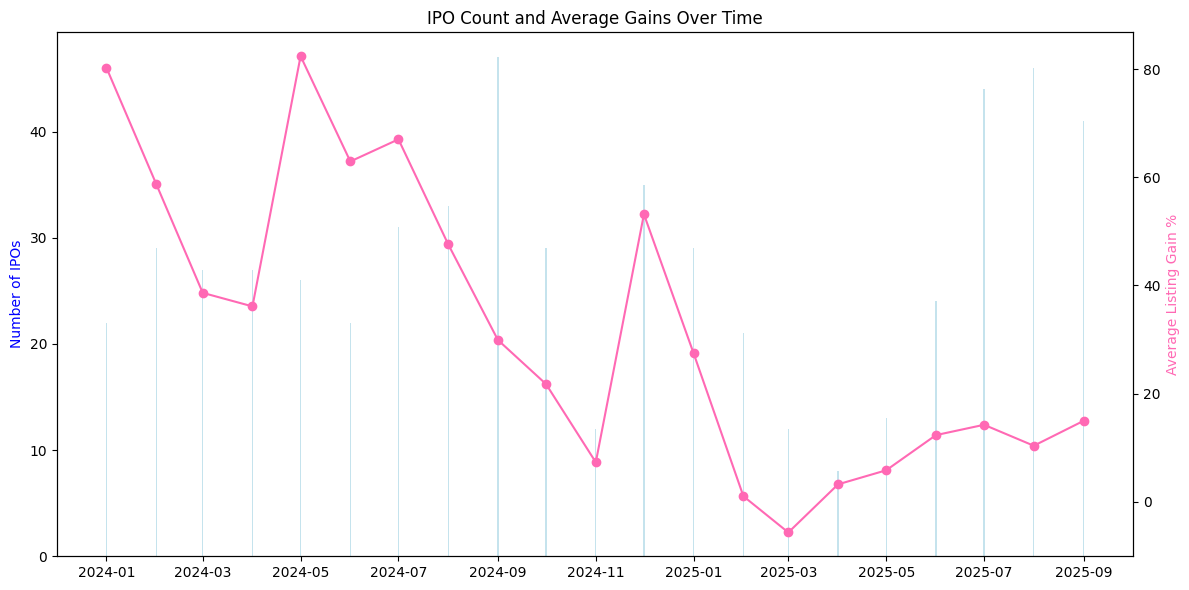

In [70]:
df['Month'] = df['Listing date'].dt.to_period("M").dt.to_timestamp()
ipo_trend = df.groupby('Month').agg(count=("COMPANY NAME","count"),
                                    avg_gain=("Listing Gain %","mean")).reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(ipo_trend['Month'], ipo_trend['count'], color="lightblue", alpha=0.7)
ax1.set_ylabel("Number of IPOs", color="blue")

ax2 = ax1.twinx()
ax2.plot(ipo_trend['Month'], ipo_trend['avg_gain'], color="hotpink", marker="o")
ax2.set_ylabel("Average Listing Gain %", color="hotpink")

plt.title("IPO Count and Average Gains Over Time")
plt.tight_layout()
plt.savefig("ipo_trend_over_time.png")
plt.show()


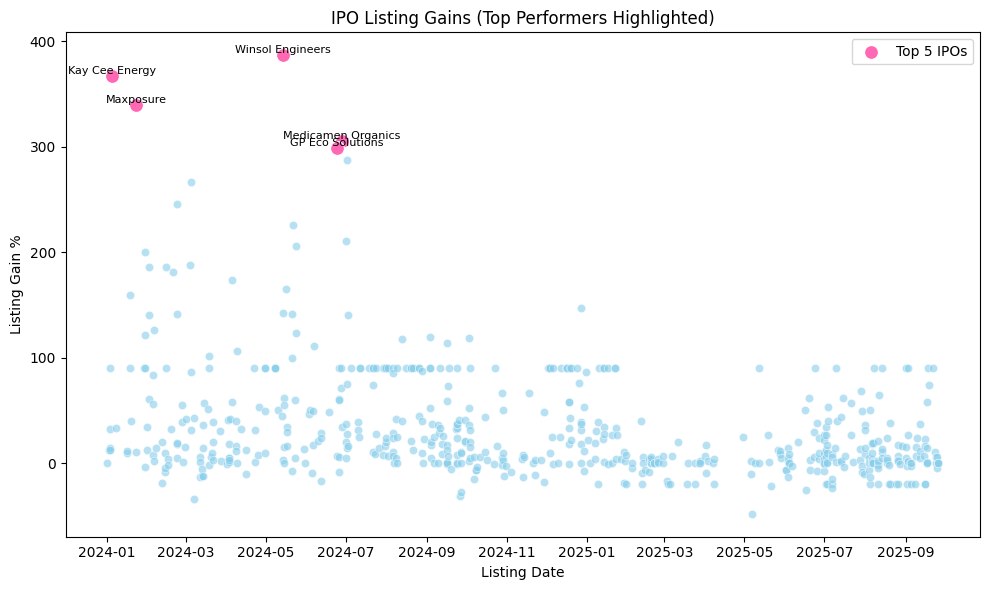

In [71]:
top5 = df.nlargest(5, 'Listing Gain %')  # top 5 gainers

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Listing date'], y=df['Listing Gain %'], alpha=0.6, color="skyblue")
sns.scatterplot(x=top5['Listing date'], y=top5['Listing Gain %'], color="hotpink", s=100, label="Top 5 IPOs")

for i, row in top5.iterrows():
    plt.text(row['Listing date'], row['Listing Gain %']+2, row['COMPANY NAME'], fontsize=8, ha='center')

plt.xlabel("Listing Date")
plt.ylabel("Listing Gain %")
plt.title("IPO Listing Gains (Top Performers Highlighted)")
plt.legend()
plt.tight_layout()
plt.savefig("ipo_top_gainers.png")
plt.show()


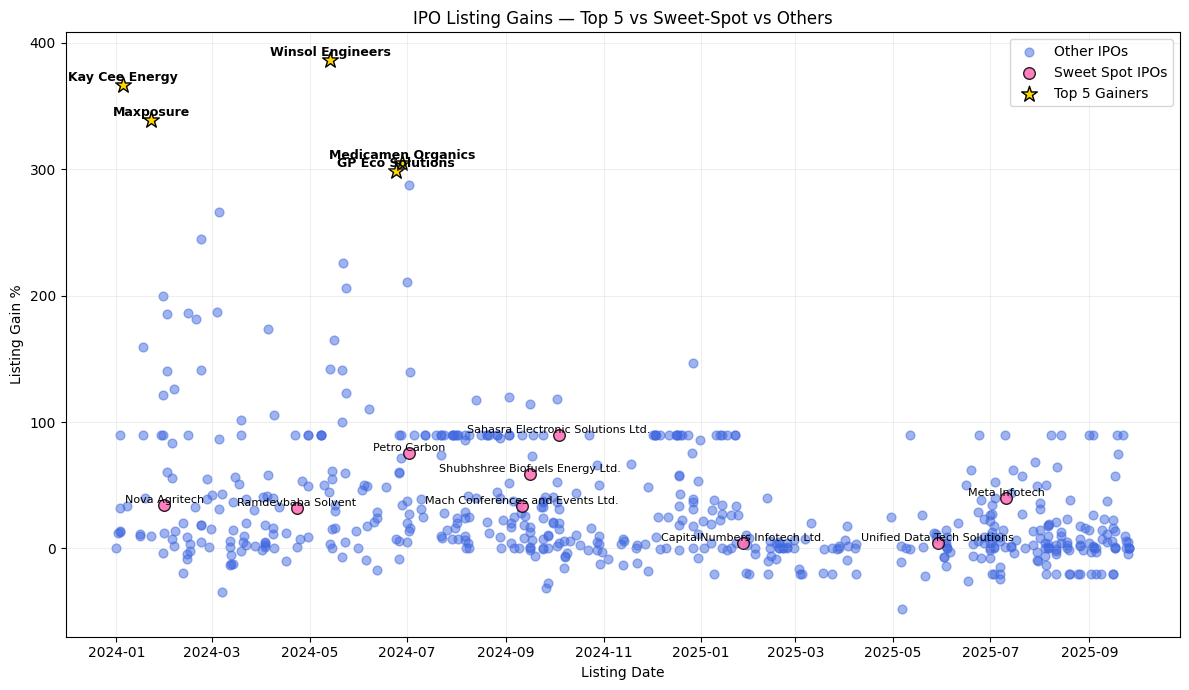

Plotted 578 total IPOs, 9 sweet IPOs, top5 labeled: ['Winsol Engineers', 'Kay Cee Energy', 'Maxposure', 'Medicamen Organics', 'GP Eco Solutions']


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Safety checks (assume df is cleaned and candidates_export exists)
if 'COMPANY NAME' not in df.columns:
    raise ValueError("df must contain 'COMPANY NAME' column.")
if 'Listing date' not in df.columns or df['Listing date'].isna().any():
    print("Warning: check Listing date column (should be parsed datetimes).")

# Ensure candidates_export exists from previous step; if not, try to create candidates by same filters
try:
    sweet_df = candidates_export.copy()
except NameError:
    # fallback: if candidates not created, try to recreate simple sweet set:
    # Using same labels used previously: TotalSub_bin == 'Mid-High' & MarketCap_bin == 'Mid-Large' & top3 sectors
    if 'TotalSub_bin' in df.columns and 'MarketCap_bin' in df.columns:
        # determine top3 sectors by median listing gain
        top3 = df.groupby('Category')['Listing Gain %'].median().sort_values(ascending=False).head(3).index.tolist()
        sweet_df = df[(df['TotalSub_bin']=='Mid-High') & (df['MarketCap_bin']=='Mid-Large') & (df['Category'].isin(top3))].copy()
    else:
        sweet_df = pd.DataFrame(columns=df.columns)  # empty

# Top 5 all-time gainers (overall)
top5 = df.nlargest(5, 'Listing Gain %').copy()

# Create a 'group' column for plotting color logic
df_plot = df.copy()
df_plot['Group'] = 'Other'
df_plot.loc[df_plot['COMPANY NAME'].isin(sweet_df['COMPANY NAME']), 'Group'] = 'Sweet'
df_plot.loc[df_plot['COMPANY NAME'].isin(top5['COMPANY NAME']), 'Group'] = 'Top5'

# Plot
plt.figure(figsize=(12,7))
# Plot Others first
others = df_plot[df_plot['Group']=='Other']
plt.scatter(others['Listing date'], others['Listing Gain %'], s=40, alpha=0.5, color='royalblue', label='Other IPOs')

# Plot Sweet
sweet = df_plot[df_plot['Group']=='Sweet']
if not sweet.empty:
    plt.scatter(sweet['Listing date'], sweet['Listing Gain %'], s=70, alpha=0.85, color='hotpink', label='Sweet Spot IPOs', edgecolors='k')

# Plot Top 5 (on top)
t5 = df_plot[df_plot['Group']=='Top5']
plt.scatter(t5['Listing date'], t5['Listing Gain %'], s=140, marker='*', color='gold', edgecolors='k', label='Top 5 Gainers')

# Annotate Top5 always
for _, r in top5.iterrows():
    plt.text(r['Listing date'], r['Listing Gain %'] + 3, r['COMPANY NAME'], fontsize=9, ha='center', weight='bold')

# Annotate sweet companies only if not too many
max_labels = 20
if len(sweet_df) <= max_labels and len(sweet_df) > 0:
    for _, r in sweet_df.iterrows():
        plt.text(r['Listing date'], r['Listing Gain %'] + 1.5, r['COMPANY NAME'], fontsize=8, ha='center')

plt.xlabel("Listing Date")
plt.ylabel("Listing Gain %")
plt.title("IPO Listing Gains — Top 5 vs Sweet-Spot vs Others")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("top_vs_sweet_vs_others.png", dpi=300)
plt.show()

print(f"Plotted {len(df_plot)} total IPOs, {len(sweet_df)} sweet IPOs, top5 labeled: {list(top5['COMPANY NAME'])}")


Interactive plot saved to: top_vs_sweet_vs_others_totalsub.html  — upload this file to GitHub or open locally to interact.


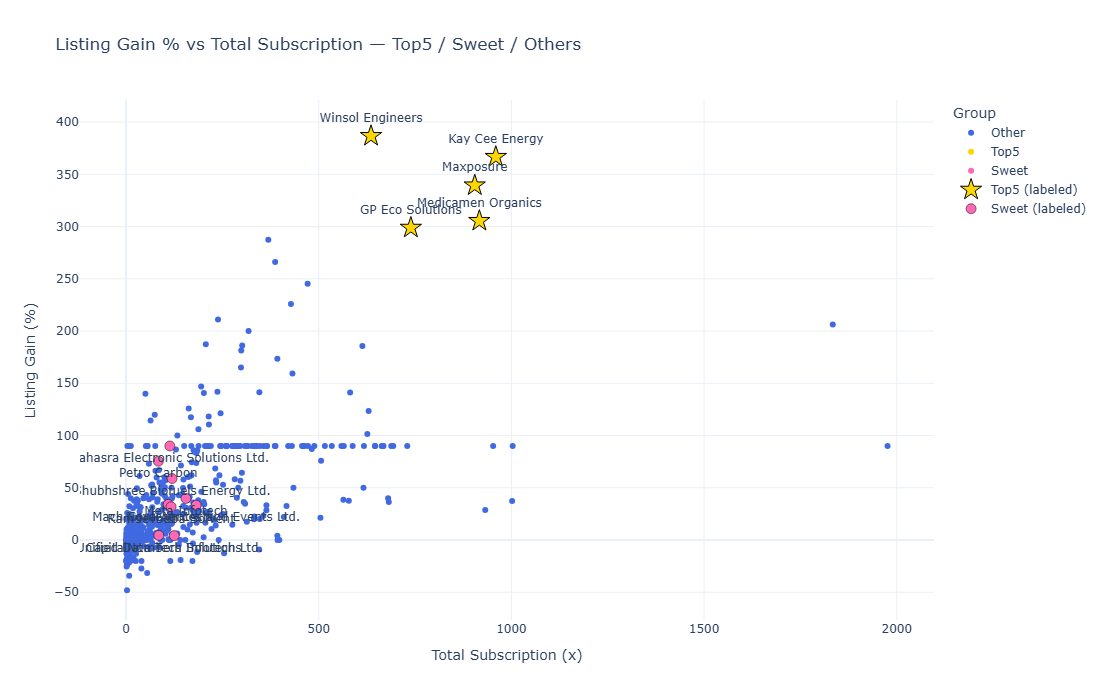

In [77]:
import plotly.express as px
import plotly.graph_objects as go


try:
    sweet_names = set(candidates_export['COMPANY NAME'])
except NameError:
    # fallback recreate sweet set based on earlier logic
    top3 = df.groupby('Category')['Listing Gain %'].median().sort_values(ascending=False).head(3).index.tolist()
    if 'TotalSub_bin' not in df.columns:
        df['TotalSub_bin'] = pd.qcut(df['total Subscription'], 4, labels=["Low","Mid-Low","Mid-High","High"])
    if 'MarketCap_bin' not in df.columns:
        df['MarketCap_bin'] = pd.qcut(df['Market Cap (Cr)'], 4, labels=["Small","Mid-Small","Mid-Large","Large"])
    sweet_df = df[(df['TotalSub_bin']=='Mid-High') & (df['MarketCap_bin']=='Mid-Large') & (df['Category'].isin(top3))]
    sweet_names = set(sweet_df['COMPANY NAME'])

top5 = df.nlargest(5, 'Listing Gain %')
top5_names = set(top5['COMPANY NAME'])

def group_label(name):
    if name in top5_names:
        return 'Top5'
    if name in sweet_names:
        return 'Sweet'
    return 'Other'

df['PlotGroup'] = df['COMPANY NAME'].apply(group_label)

# Build hover text
df['hover_text'] = df.apply(
    lambda r: f"{r['COMPANY NAME']}<br>Sector: {r['Category']}<br>Listing Gain: {r['Listing Gain %']:.2f}%"
              f"<br>Total Sub: {r['total Subscription']}x<br>Market Cap: {r['Market Cap (Cr)']} Cr",
    axis=1
)

fig = px.scatter(
    df,
    x='total Subscription',
    y='Listing Gain %',
    color='PlotGroup',
    color_discrete_map={'Other':'royalblue','Sweet':'hotpink','Top5':'gold'},
    hover_name='COMPANY NAME',
    hover_data={'Category':True, 'Listing Gain %':True, 'total Subscription':True, 'Market Cap (Cr)':True},
    size_max=12,
    labels={'total Subscription':'Total Subscription (x)','Listing Gain %':'Listing Gain (%)'},
    title='Listing Gain % vs Total Subscription — Top5 / Sweet / Others'
)


top5_df = df[df['PlotGroup']=='Top5']
if not top5_df.empty:
    fig.add_trace(go.Scatter(
        x=top5_df['total Subscription'],
        y=top5_df['Listing Gain %'],
        mode='markers+text',
        marker=dict(symbol='star', size=16, color='gold', line=dict(width=1, color='black')),
        text=top5_df['COMPANY NAME'],
        textposition='top center',
        name='Top5 (labeled)',
        hoverinfo='text',
        hovertext=top5_df['hover_text']
    ))

max_labels = 20
sweet_df_plot = df[df['PlotGroup']=='Sweet']
if len(sweet_df_plot) <= max_labels and len(sweet_df_plot) > 0:
    fig.add_trace(go.Scatter(
        x=sweet_df_plot['total Subscription'],
        y=sweet_df_plot['Listing Gain %'],
        mode='markers+text',
        marker=dict(symbol='circle', size=10, color='hotpink', line=dict(width=0.5, color='black')),
        text=sweet_df_plot['COMPANY NAME'],
        textposition='bottom center',
        name='Sweet (labeled)',
        hoverinfo='text',
        hovertext=sweet_df_plot['hover_text']
    ))


fig.update_layout(
    legend_title_text='Group',
    template='plotly_white',
    width=1100, height=700
)

out_html = "top_vs_sweet_vs_others_totalsub.html"
fig.write_html(out_html, include_plotlyjs='cdn')
print(f"Interactive plot saved to: {out_html}  — upload this file to GitHub or open locally to interact.")

fig.show()


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

df['SubsRange'] = pd.cut(
    df['total Subscription'],
    bins=[-0.1, 25, 50, 100, df['total Subscription'].max()],
    labels=["0–25x","25–50x","50–100x","100x+"]
)

heatmap_data = df.pivot_table(
    index="Category",
    columns="SubsRange",
    values="Listing Gain %",
    aggfunc="mean"
)

heatmap_data.to_excel("sector_vs_subsrange_mean.xlsx")
print("Saved sector vs subscription range (mean gains) to sector_vs_subsrange_mean.xlsx")

display(heatmap_data.head())


Saved sector vs subscription range (mean gains) to sector_vs_subsrange_mean.xlsx


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\3497564112.py:10: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



SubsRange,0–25x,25–50x,50–100x,100x+
Category,,,,
Agriculture,-15.220000,30.650000,55.600000,51.011111
Chemicals,9.433333,-0.480000,NaN,55.900000
Energy,1.313333,5.750000,55.728571,134.595000
FMCG,9.514286,12.800000,26.470000,44.662500
Finance,-2.130000,-3.333333,30.566667,45.916667


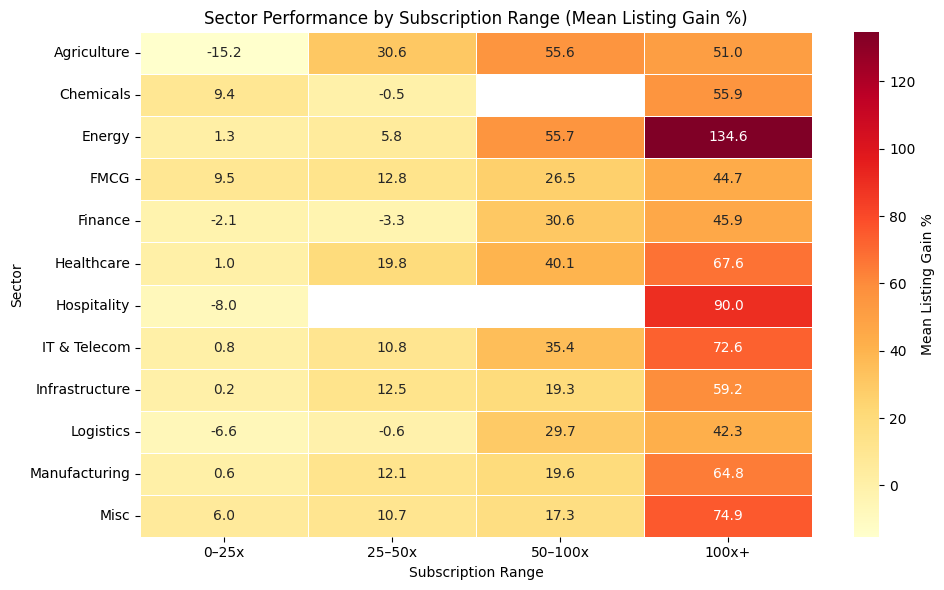

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label':'Mean Listing Gain %'})
plt.title("Sector Performance by Subscription Range (Mean Listing Gain %)")
plt.xlabel("Subscription Range")
plt.ylabel("Sector")
plt.tight_layout()
plt.savefig("sector_vs_subsrange_heatmap.png", dpi=300)
plt.show()


In [76]:
sector_subs_summary = (
    df.groupby(['SubsRange','Category'])['Listing Gain %']
    .agg(['count','mean','median'])
    .reset_index()
    .sort_values(['SubsRange','mean'], ascending=[True,False])
)

sector_subs_summary.to_excel("sector_ranking_by_subsrange.xlsx", index=False)

top3_by_subsrange = (
    sector_subs_summary
    .sort_values(['SubsRange','mean'], ascending=[True,False])
    .groupby('SubsRange')
    .head(3)
    .reset_index(drop=True)
)

print("Top 3 sectors per subscription range (by mean listing gain):")
display(top3_by_subsrange)

top3_pivot = top3_by_subsrange.groupby('SubsRange')['Category'].apply(list).reset_index()
top3_pivot.columns = ['Subscription Range','Top 3 Sectors']
display(top3_pivot)

top3_pivot.to_excel("top3_sectors_per_subsrange.xlsx", index=False)


Top 3 sectors per subscription range (by mean listing gain):


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\167843413.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\167843413.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,SubsRange,Category,count,mean,median
0,0–25x,FMCG,28,9.514286,4.55
1,0–25x,Chemicals,6,9.433333,8.10
2,0–25x,Misc,22,6.040909,2.65
3,25–50x,Agriculture,2,30.650000,30.65
4,25–50x,Healthcare,1,19.800000,19.80
5,25–50x,FMCG,8,12.800000,9.45
6,50–100x,Energy,7,55.728571,66.30
7,50–100x,Agriculture,1,55.600000,55.60
8,50–100x,Healthcare,8,40.062500,38.15
9,100x+,Energy,20,134.595000,90.00


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\167843413.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Subscription Range,Top 3 Sectors
0,0–25x,"[FMCG, Chemicals, Misc]"
1,25–50x,"[Agriculture, Healthcare, FMCG]"
2,50–100x,"[Energy, Agriculture, Healthcare]"
3,100x+,"[Energy, Hospitality, Misc]"


In [78]:
sector_subs_summary_median = (
    df.groupby(['SubsRange','Category'])['Listing Gain %']
    .agg(['count','mean','median'])
    .reset_index()
    .sort_values(['SubsRange','median'], ascending=[True,False])
)

sector_subs_summary_median.to_excel("sector_ranking_by_subsrange_median.xlsx", index=False)

top3_by_subsrange_median = (
    sector_subs_summary_median
    .sort_values(['SubsRange','median'], ascending=[True,False])
    .groupby('SubsRange')
    .head(3)
    .reset_index(drop=True)
)

print("Top 3 sectors per subscription range (by median listing gain):")
display(top3_by_subsrange_median)

top3_pivot_median = top3_by_subsrange_median.groupby('SubsRange')['Category'].apply(list).reset_index()
top3_pivot_median.columns = ['Subscription Range','Top 3 Sectors (Median-based)']
display(top3_pivot_median)

top3_pivot_median.to_excel("top3_sectors_per_subsrange_median.xlsx", index=False)


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1025998463.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Top 3 sectors per subscription range (by median listing gain):


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1025998463.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,SubsRange,Category,count,mean,median
0,0–25x,Chemicals,6,9.433333,8.10
1,0–25x,FMCG,28,9.514286,4.55
2,0–25x,IT & Telecom,18,0.805556,3.45
3,25–50x,Agriculture,2,30.650000,30.65
4,25–50x,Healthcare,1,19.800000,19.80
5,25–50x,Manufacturing,14,12.057143,11.10
6,50–100x,Energy,7,55.728571,66.30
7,50–100x,Agriculture,1,55.600000,55.60
8,50–100x,Healthcare,8,40.062500,38.15
9,100x+,Energy,20,134.595000,90.00


C:\Users\Nishil Gangrade\AppData\Local\Temp\ipykernel_10104\1025998463.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Subscription Range,Top 3 Sectors (Median-based)
0,0–25x,"[Chemicals, FMCG, IT & Telecom]"
1,25–50x,"[Agriculture, Healthcare, Manufacturing]"
2,50–100x,"[Energy, Agriculture, Healthcare]"
3,100x+,"[Energy, Hospitality, Infrastructure]"
